# Facial recognition with Support Vector Machine (SVM)

In [1]:
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#import ssl
#ssl._create_default_https_context = ssl._create_unverified_context

from sklearn.datasets import fetch_olivetti_faces
faces=fetch_olivetti_faces()

In [3]:
print(faces.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position
    (with tolerance for some side movement).

**Data Set Characteristics:**

=================   =====================
Classes              

In [4]:
print(faces.keys())

dict_keys(['data', 'images', 'target', 'DESCR'])


In [5]:
print(faces.data.shape)

(400, 4096)


In [6]:
print(faces.images.shape)

(400, 64, 64)


In [7]:
print(faces.target.shape)

(400,)


In [8]:
#Use fstring
print(np.min(faces.data),np.max(faces.data),np.mean(faces.data))

0.0 1.0 0.5470426


Here's a function to print images as a matrix of pixels as we have done before.

In [9]:
def print_faces(images, target, top_n):
    fig = plt.figure(figsize=(12,12))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    for i in range(top_n):
        p = fig.add_subplot(20,20,i+1,xticks=[],yticks=[]) # each image is a 20x20 matrix
        p.imshow(images[i], cmap=plt.cm.bone)
        p.text(0,14,str(target[i]))
        p.text(0,60,str(i))

We can look at all the images by printing them together

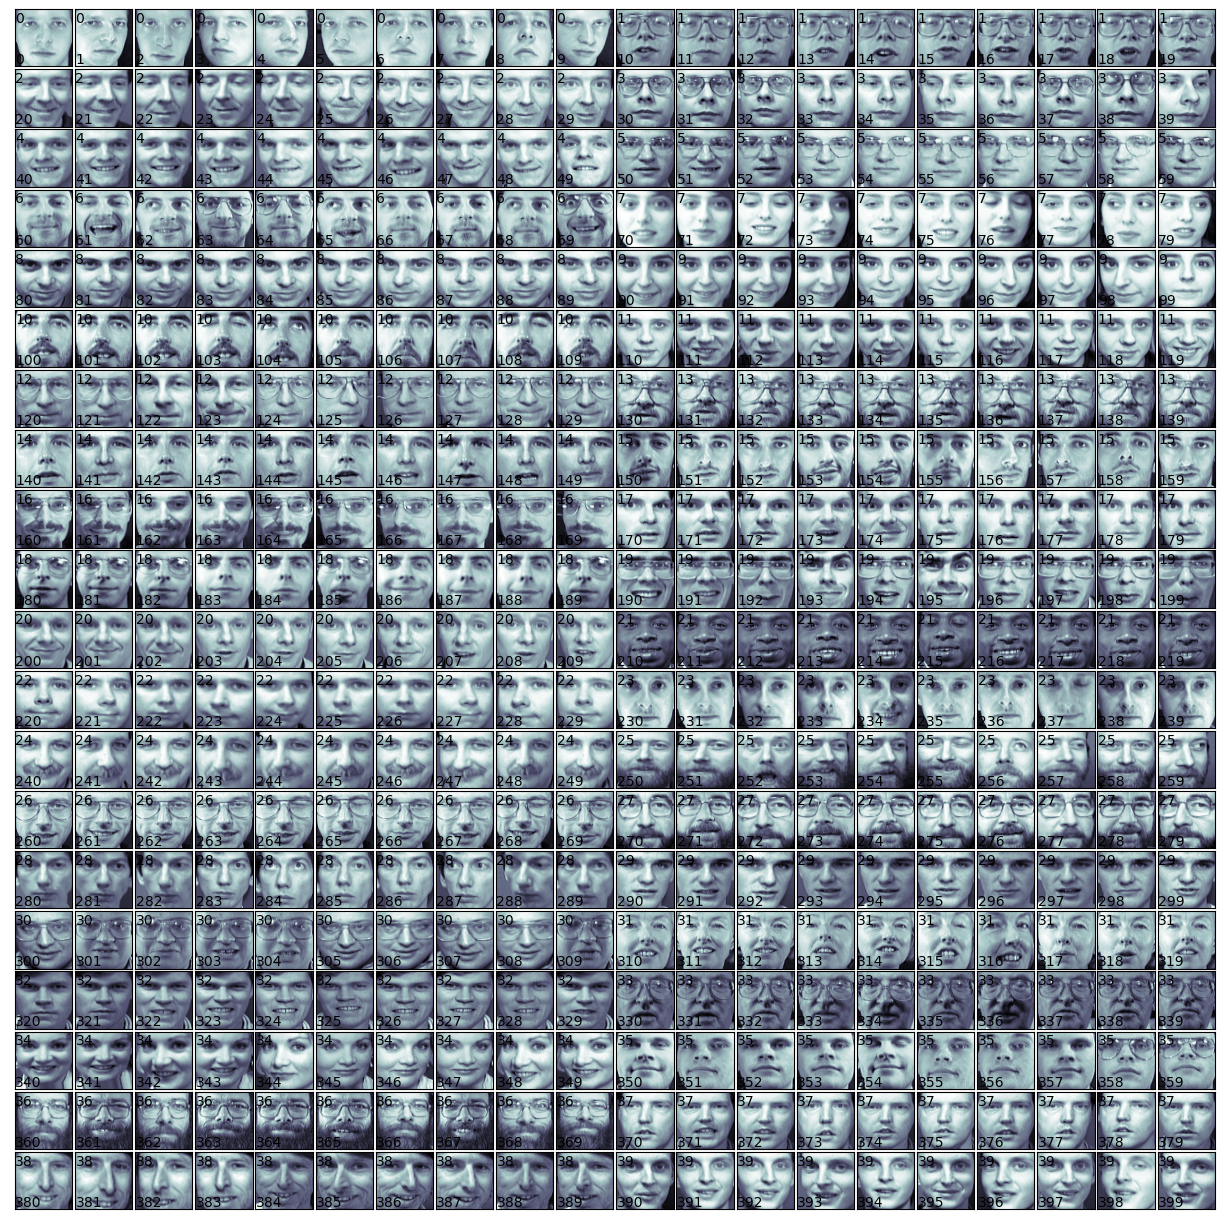

In [10]:
print_faces(faces.images, faces.target, 400)

### Support vector machine

In [11]:
from sklearn.svm import SVC # Support Vector Classifier
svc_1 = SVC(kernel='linear')

In [12]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, test_size=0.2, random_state=0)

svc_1.fit(X_train, y_train)

train_score=svc_1.score(X_train, y_train)
print('Score for training set',train_score)

test_score=svc_1.score(X_test, y_test)
print('Score for test set',test_score)

Score for training set 1.0
Score for test set 0.9875


Recall that we looked at the classification report for the iris data. Now, let's obtain a similar report for the images.

In [13]:
y_pred_test=svc_1.predict(X_test)
print(metrics.classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       1.00      0.67      0.80         3
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         4
          15       1.00      1.00      1.00         3
          17       1.00      1.00      1.00         6
          19       1.00      1.00      1.00         3
          20       1.00    

In [14]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(320, 4096) (80, 4096) (320,) (80,)


### Take-home assignment

In this project, you will develop a small images dataset (similar to the `faces` dataset) and apply SVM classfier to perform data-analytics of your choice. 

Here are two suggestions for the dataset. 

1. Collect 10 images of 10 of your favorite flowers from the internet. 

2. Collect 10 images of 10 birds or animals.  

The angle of view in each of the 10 images may be different. Ensure that the images are cropped appropriately and most of the facial features are visible clearly.  

Prepare a dataset. If you want to get some idea about including various attributes such as `DESCR`, `keys`, etc., as in the case of `faces` or `digits` datasets, then try `print (faces)` and inspect the output.

Do a 80/20 split, i.e., 80 random entries for training and 20 for testing.

Train SVM on the 80 points and predict the labels of the 20 points in the test set. 

Describe the SVM method in your report. 

The report should be presented in a jupyter notebook.